In [1]:
import matplotlib.pyplot as plt
import qutip as qt
import numpy as np
import time

In [2]:
import cmath

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

In [4]:
start_time = time.time()

In [5]:
Id = qt.qeye(4) # Operdaor identidad
Id

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

In [6]:
sx = qt.sigmax() 
sy = qt.sigmay()
sz = qt.sigmaz()

In [7]:
SX = qt.tensor(sx,qt.qeye(2))
SY = qt.tensor(sy,qt.qeye(2))
SZ = qt.tensor(sz,qt.qeye(2))

In [8]:
rho1 = []; rho2 = []; rho3 = [];
rho4 = []; rho5 = []; rho6 = [];
rho7 = []; rho8 = []; 

In [9]:
rho9 = [];  rho10 = []; rho11 = [];
rho12 = []; rho13 = []; rho14 = [];
rho15 = []; rho16 = []; 

In [10]:
GammaList = np.linspace(-1,1,100)

In [11]:
def roXY(gamma, Temp):
    Z = 2*(np.cosh(1/Temp) + np.cosh(gamma/Temp))
    ro = qt.Qobj(np.matrix([[ (np.cosh(gamma/Temp))/Z, 0                      , 0              , -(np.sinh(gamma/Temp))/Z ] 
                           ,[ 0                      , (np.cosh(1/Temp))/Z,-(np.sinh(1/Temp))/Z, 0                        ]
                           ,[ 0                      ,-(np.sinh(1/Temp))/Z, (np.cosh(1/Temp))/Z, 0                        ]
                           ,[-(np.sinh(gamma/Temp))/Z, 0                      , 0              ,  (np.cosh(gamma/Temp))/Z ]]))
    return ro

In [12]:
def CalcularSkew(Plist,ro):
        Skew = [] # Lista donde se guardaran la informacion de skew de cada matriz de densidad  
        for ii in range(0,len(Plist)):
                evals11, ekets11 =ro[ii].eigenstates()  # Obtener los eigenestados de la matriz de densidad ro[p]
                SX_base_rho = (SX.transform(ekets11))   # Hacer el cambio de base de Sx a la base de la matriz de densidad
                SY_base_rho = (SY.transform(ekets11))   # Hacer el cambio de base de Sy a la base de la matriz de densidad
                SZ_base_rho = (SZ.transform(ekets11))   # Hacer el cambio de base de Sz a la base de la matriz de densidad
                roDiagonal = (ro[ii].transform(ekets11))# Diagonalizar la matriz de densidad
                roDiagonalRaiz = qt.Qobj(np.sqrt(roDiagonal))# Obtener la razi de la matriz de densidad diagonalizada 
                g = [] # Lista donde se guardaran los elementos de la matriz W
                SigmasBaseRho = [SX_base_rho, SY_base_rho, SZ_base_rho] # Lista de los operadores Sx,Sy,Sz
                for i in range(0,3):
                    for j in range(0,3):  
                        A = roDiagonalRaiz*(qt.Qobj(SigmasBaseRho[i].data.toarray(),dims=[[4],[4]])) # \sqrt{\rho_{AB}} (\sigma_{iA} \otimes I_{B} )
                        B = roDiagonalRaiz*(qt.Qobj(SigmasBaseRho[j].data.toarray(),dims=[[4],[4]]))  # \sqrt{\rho_{AB}}  (\sigma_{jA} \otimes I_{B} )
                        AB = A*B 
                        g.append( AB.tr() )  # Elemento de la matriz ij
                Matriz_W_A1 = qt.Qobj(np.matrix([[g[0]  , g[1]  , g[2] ] # Construir la matriz W 
                                                ,[g[3]  , g[4]  , g[5] ]
                                                ,[g[6]  , g[7]  , g[8] ]]))
                evals1, ekets1 =Matriz_W_A1.eigenstates() #Obtener los eigenestados de la matriz W
                Skew.append(1-np.amax(evals1)) # Obtener la informacion de Skew
        return Skew 

In [13]:
def Calcular_elemento(SigmasBaseRho,evals,label1,label2):
    g=[] # Lista donde se guardara los elementos para calcular el elmento de matriz W[label1.label2]
    epsilon = 0.0001
    for i in range(0,4):
        for j in range(0,4):
            if i==j: #abs(evals[i]-evals[j])<epsilon:
                g.append(0)                         
            elif (evals[i]+evals[j]) < 0.000000000000000001: 
                g.append(0) # Si el denominador de la formula para obtener la elemento W[label1.label2] es cercana a cero, el elemnento guardado sera cero  
            else:
                g.append( ((2*(evals[i]*evals[j]))/(evals[i]+evals[j]))*(SigmasBaseRho[label1][i,j]*SigmasBaseRho[label2][j,i] )  ) # Calcula el elemento de matriz W[label1.label2]                 
    return g

In [14]:
def CalcularFisherUp(Plist,ro):
        Fisher= [] #Lista donde se guardara la informacion de Fisher para cada matriz de densidad
        for ii in range(0,len(Plist)):
                evals11, ekets11 =ro[ii].eigenstates() # Obtener los eigenestados de la matriz de densidad ro[p]
                SX_base_rho = (SX.transform(ekets11))  # Hacer el cambio de base de Sx a la base de la matriz de densidad
                SY_base_rho = (SY.transform(ekets11))  # Hacer el cambio de base de Sy a la base de la matriz de densidad
                SZ_base_rho = (SZ.transform(ekets11))  # Hacer el cambio de base de Sz a la base de la matriz de densidad
                SigmasBaseRho = [SX_base_rho, SY_base_rho, SZ_base_rho] # Lista de los operadores Sx,Sy,Sz
                g11=[] #Lista donde se guardara los valores para obtener el elemento de matriz W11
                g12=[] # "                                                                "  W12
                g13=[]
                g21=[]
                g22=[]
                g23=[]
                g31=[]
                g32=[]
                g33=[]
                g11 = Calcular_elemento(SigmasBaseRho,evals11,0,0) # Calcula los valores para obtener el elemento W11
                g12 = Calcular_elemento(SigmasBaseRho,evals11,0,1) # Calcula los valores para obtener el elemento W12
                g13 = Calcular_elemento(SigmasBaseRho,evals11,0,2) # Calcula los valores para obtener el elemento W13
                g21 = Calcular_elemento(SigmasBaseRho,evals11,1,0) # "                                           " W21
                g22 = Calcular_elemento(SigmasBaseRho,evals11,1,1) # "                                           " W22
                g23 = Calcular_elemento(SigmasBaseRho,evals11,1,2) # "                                           " W23
                g31 = Calcular_elemento(SigmasBaseRho,evals11,2,0) # "                                           " W31
                g32 = Calcular_elemento(SigmasBaseRho,evals11,2,1) # "                                           " W32
                g33 = Calcular_elemento(SigmasBaseRho,evals11,2,2)# "                                            " W33
                W11 = np.sum(g11) # Se hace la suma para obtener el elmento de matirz W11           
                W12 = np.sum(g12) # "                                             " W12           
                W13 = np.sum(g13) # "                                             " W13  
                W21 = np.sum(g21) # "                                             " W21            
                W22 = np.sum(g22) # "                                             " W22           
                W23 = np.sum(g23) # "                                             " W23           
                W31 = np.sum(g31) # "                                             " W31
                W32 = np.sum(g32) # "                                             " W32
                W33 = np.sum(g33) # "                                             " W33
                Matriz_W_A1 = qt.Qobj(np.matrix([[W11  , W12  , W13 ] # Construir la matriz W 
                                                ,[W21  , W22  , W23 ]
                                                ,[W31  , W32  , W33 ]]))
                evals1, ekets1 =Matriz_W_A1.eigenstates() #Obtener los eigenestados de la matriz W
                Fisher.append(1-np.amax(evals1))  # Obtener la informacion de Fisher
        return Fisher

In [15]:
def CalcularRhoTemp(Gam,T):
    rho = [];
    for g in Gam: 
        rho.append(roXY(g,T))
    return rho  

In [16]:
rho1 = CalcularRhoTemp(GammaList,0.2)
rho2 = CalcularRhoTemp(GammaList,0.4)
rho3 = CalcularRhoTemp(GammaList,0.6)
rho4 = CalcularRhoTemp(GammaList,0.8)
rho5 = CalcularRhoTemp(GammaList,1.0)
rho6 = CalcularRhoTemp(GammaList,1.2)
rho7 = CalcularRhoTemp(GammaList,1.6)
rho8 = CalcularRhoTemp(GammaList,2.0)

In [17]:
Fisher1 = []; Fisher2 = []; Fisher3 = [];
Fisher4 = []; Fisher5 = []; Fisher6 = [];
Fisher7 = []; Fisher8 = []; # Lista donde se guardara la informacion de Fisher para cada ro

In [18]:
Skew1 = []; Skew2 = []; Skew3 = [] 
Skew4 = []; Skew5 = []; Skew6 = [] 
Skew7 = []; Skew8 = [];  # Lista donde se guardara la informacion de Skew para cada ro

In [19]:
Fisher1 = CalcularFisherUp(GammaList,rho1)
Fi1 = np.array(Fisher1)
#######################################
Fisher2 = CalcularFisherUp(GammaList,rho2)
Fi2 = np.array(Fisher2)
#######################################
Fisher3 = CalcularFisherUp(GammaList,rho3)
Fi3 = np.array(Fisher3)
#######################################
Fisher4 = CalcularFisherUp(GammaList,rho4)
Fi4 = np.array(Fisher4)
#######################################
Fisher5 = CalcularFisherUp(GammaList,rho5)
Fi5 = np.array(Fisher5)
#######################################
Fisher6 = CalcularFisherUp(GammaList,rho6)
Fi6 = np.array(Fisher6)
#######################################
Fisher7 = CalcularFisherUp(GammaList,rho7)
Fi7 = np.array(Fisher7)
#######################################
Fisher8 = CalcularFisherUp(GammaList,rho8)
Fi8 = np.array(Fisher8)


In [20]:
Skew1 = CalcularSkew(GammaList,rho1)
Sk1 = np.array(Skew1)
#######################################
Skew2 = CalcularSkew(GammaList,rho2)
Sk2 = np.array(Skew2)
#######################################
Skew3 = CalcularSkew(GammaList,rho3)
Sk3 = np.array(Skew3)
#######################################
Skew4 = CalcularSkew(GammaList,rho4)
Sk4 = np.array(Skew4)
#######################################
Skew5 = CalcularSkew(GammaList,rho5)
Sk5 = np.array(Skew5)
#######################################
Skew6 = CalcularSkew(GammaList,rho6)
Sk6 = np.array(Skew6)
#######################################
Skew7 = CalcularSkew(GammaList,rho7)
Sk7 = np.array(Skew7)
#######################################
Skew8 = CalcularSkew(GammaList,rho8)
Sk8 = np.array(Skew8)

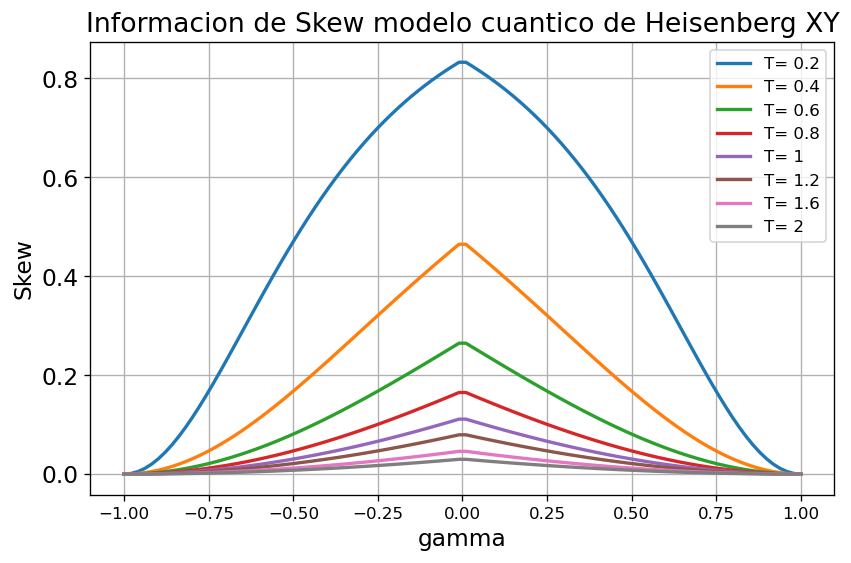

In [37]:
plt.figure(figsize = (8,5))
plt.title('Informacion de Skew modelo cuantico de Heisenberg XY', fontsize = 16 )
#plt.plot(GammaList,Fi1.real, label= 'Fisher', linewidth=3)
plt.plot(GammaList,Sk1.real, label= 'T= 0.2'  ,linewidth=2)
plt.plot(GammaList,Sk2.real, label= 'T= 0.4'  ,linewidth=2)
plt.plot(GammaList,Sk3.real, label= 'T= 0.6'  ,linewidth=2)
plt.plot(GammaList,Sk4.real, label= 'T= 0.8'  ,linewidth=2)
plt.plot(GammaList,Sk5.real, label= 'T= 1'  ,linewidth=2)
plt.plot(GammaList,Sk6.real, label= 'T= 1.2'  ,linewidth=2)
plt.plot(GammaList,Sk7.real, label= 'T= 1.6'  ,linewidth=2)
plt.plot(GammaList,Sk8.real, label= 'T= 2'  ,linewidth=2)
#plt.plot(GammaList,Concu, label= 'Concurrencia (Medida de entrelazamiento)'  ,linewidth=3)

plt.grid()
plt.xlabel('gamma',fontsize = 14)
plt.ylabel('Skew',fontsize = 14)
plt.legend()
plt.yticks(fontsize = 14)
#plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], fontsize = 14)


plt.savefig('Medida_Skew_XY.png', dpi=500)
plt.show()

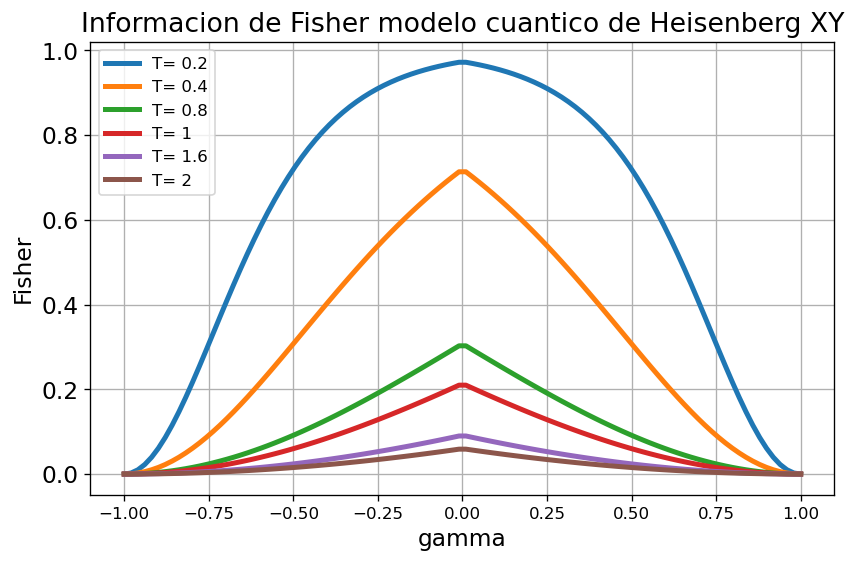

In [50]:
plt.figure(figsize = (8,5))
plt.title('Informacion de Fisher modelo cuantico de Heisenberg XY', fontsize = 16 )
#plt.plot(GammaList,Fi1.real, label= 'Fisher', linewidth=3)
plt.plot(GammaList,Fi1.real, label= 'T= 0.2'  ,linewidth=3)
plt.plot(GammaList,Fi2.real, label= 'T= 0.4'  ,linewidth=3)
#plt.plot(GammaList,Fi3.real, label= 'T= 0.6'  ,linewidth=3)
plt.plot(GammaList,Fi4.real, label= 'T= 0.8'  ,linewidth=3)
plt.plot(GammaList,Fi5.real, label= 'T= 1'  ,linewidth=3)
#plt.plot(GammaList,Fi6.real, label= 'T= 1.2'  ,linewidth=3)
plt.plot(GammaList,Fi7.real, label= 'T= 1.6'  ,linewidth=3)
plt.plot(GammaList,Fi8.real, label= 'T= 2'  ,linewidth=3)
#plt.plot(GammaList,Concu, label= 'Concurrencia (Medida de entrelazamiento)'  ,linewidth=3)

plt.grid()
plt.xlabel('gamma',fontsize = 14)
plt.ylabel('Fisher',fontsize = 14)
plt.legend(loc ='upper left')
plt.yticks(fontsize = 14)
#plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], fontsize = 14)


plt.savefig('Medida_Fisher_XY.png', dpi=500)
plt.show()

In [23]:
def CalcularRhoGam(Gam,Tlist):
    rho = [];
    for T in Tlist: 
        rho.append(roXY(Gam,T))
    return rho  

In [24]:
TempList = np.linspace(0.009,3,100)

In [25]:
rho9  = CalcularRhoGam(0,TempList)
rho10 = CalcularRhoGam(0.2,TempList)
rho11 = CalcularRhoGam(0.4,TempList)
rho12 = CalcularRhoGam(0.5,TempList)
rho13 = CalcularRhoGam(0.6,TempList)
rho14 = CalcularRhoGam(0.8,TempList)
rho15 = CalcularRhoGam(0.9,TempList)
rho16 = CalcularRhoGam(1,TempList)

In [26]:
Fisher9 = [];  Fisher10 = []; Fisher11 = [];
Fisher12 = []; Fisher13 = []; Fisher14 = [];
Fisher15 = []; Fisher16 = []; # Lista donde se guardara la informacion de Fisher para cada ro

In [27]:
Skew9 = [];  Skew10 = []; Skew11 = [] 
Skew12 = []; Skew13 = []; Skew14 = [] 
Skew15 = []; Skew16 = [];  # Lista donde se guardara la informacion de Skew para cada ro

In [28]:
Fisher9 = CalcularFisherUp(TempList,rho9)
Fi9 = np.array(Fisher9)
#######################################
Fisher10 = CalcularFisherUp(TempList,rho10)
Fi10 = np.array(Fisher10)
#######################################
Fisher11 = CalcularFisherUp(TempList,rho11)
Fi11 = np.array(Fisher11)
#######################################
Fisher12 = CalcularFisherUp(TempList,rho12)
Fi12 = np.array(Fisher12)
#######################################
Fisher13 = CalcularFisherUp(TempList,rho13)
Fi13 = np.array(Fisher13)
#######################################
Fisher14 = CalcularFisherUp(TempList,rho14)
Fi14 = np.array(Fisher14)
#######################################
Fisher15 = CalcularFisherUp(TempList,rho15)
Fi15 = np.array(Fisher15)
#######################################
Fisher16 = CalcularFisherUp(TempList,rho16)
Fi16 = np.array(Fisher16)

In [29]:
Skew9 = CalcularSkew(TempList,rho9)
Sk9 = np.array(Skew9)
#######################################
Skew10 = CalcularSkew(TempList,rho10)
Sk10 = np.array(Skew10)
#######################################
Skew11 = CalcularSkew(TempList,rho11)
Sk11 = np.array(Skew11)
#######################################
Skew12 = CalcularSkew(TempList,rho12)
Sk12 = np.array(Skew12)
#######################################
Skew13 = CalcularSkew(TempList,rho13)
Sk13 = np.array(Skew13)
#######################################
Skew14 = CalcularSkew(TempList,rho14)
Sk14 = np.array(Skew14)
#######################################
Skew15 = CalcularSkew(TempList,rho15)
Sk15 = np.array(Skew15)
#######################################
Skew16 = CalcularSkew(TempList,rho16)
Sk16 = np.array(Skew16)

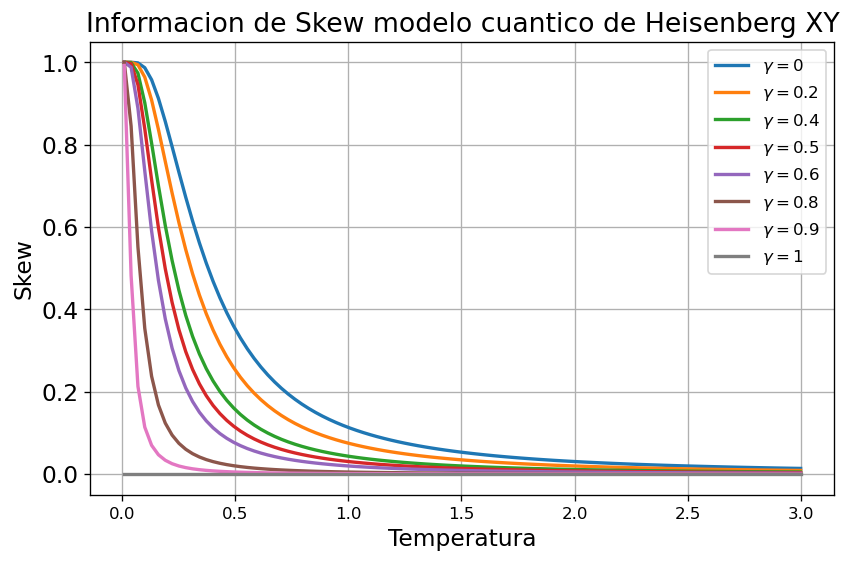

In [39]:
plt.figure(figsize = (8,5))
plt.title('Informacion de Skew modelo cuantico de Heisenberg XY', fontsize = 16 )
#plt.plot(GammaList,Fi1.real, label= 'Fisher', linewidth=3)
plt.plot(TempList,Sk9.real,  label= r'$\gamma= 0$'  ,linewidth=2)
plt.plot(TempList,Sk10.real, label= r'$\gamma= 0.2$' ,linewidth=2)
plt.plot(TempList,Sk11.real, label= r'$\gamma= 0.4$'  ,linewidth=2)
plt.plot(TempList,Sk12.real, label= r'$\gamma= 0.5$'  ,linewidth=2)
plt.plot(TempList,Sk13.real, label= r'$\gamma= 0.6$'  ,linewidth=2)
plt.plot(TempList,Sk14.real, label= r'$\gamma= 0.8$'  ,linewidth=2)
plt.plot(TempList,Sk15.real, label= r'$\gamma= 0.9$'  ,linewidth=2)
plt.plot(TempList,Sk16.real, label= r'$\gamma= 1$'  ,linewidth=2)
#plt.plot(GammaList,Concu, label= 'Concurrencia (Medida de entrelazamiento)'  ,linewidth=3)

plt.grid()
plt.xlabel('Temperatura',fontsize = 14)
plt.ylabel('Skew',fontsize = 14)
plt.legend()
plt.yticks(fontsize = 14)
#plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], fontsize = 14)


plt.savefig('Medida_Skew_XY_2.png', dpi=500)
plt.show()

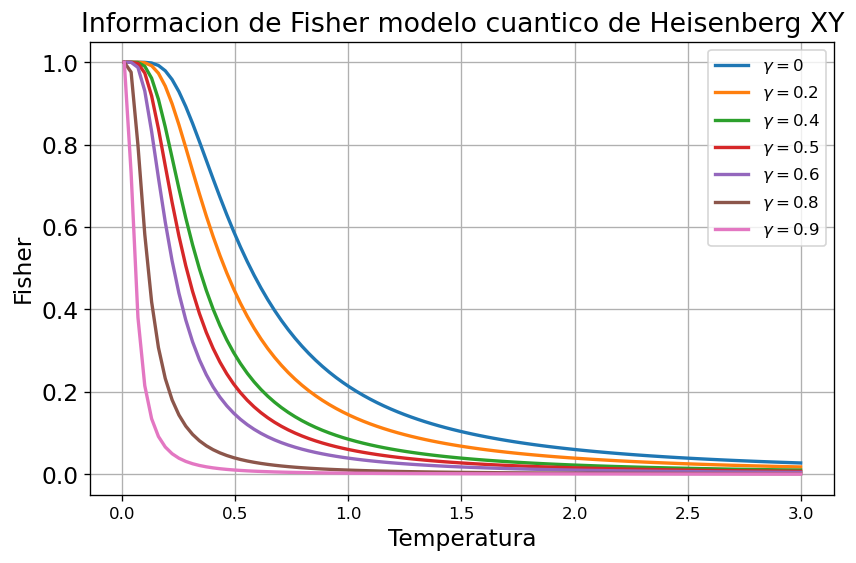

In [51]:
plt.figure(figsize = (8,5))
plt.title('Informacion de Fisher modelo cuantico de Heisenberg XY', fontsize = 16 )
#plt.plot(GammaList,Fi1.real, label= 'Fisher', linewidth=3)
plt.plot(TempList,Fi9.real , label= r'$\gamma= 0$'  ,linewidth=2)
plt.plot(TempList,Fi10.real, label= r'$\gamma= 0.2$'  ,linewidth=2)
plt.plot(TempList,Fi11.real, label= r'$\gamma= 0.4$'  ,linewidth=2)
plt.plot(TempList,Fi12.real, label= r'$\gamma= 0.5$'  ,linewidth=2)
plt.plot(TempList,Fi13.real, label= r'$\gamma= 0.6$' ,linewidth=2)
plt.plot(TempList,Fi14.real, label= r'$\gamma= 0.8$'  ,linewidth=2)
plt.plot(TempList,Fi15.real, label= r'$\gamma= 0.9$'  ,linewidth=2)
#plt.plot(TempList,Fi16.real, label= r'$\gamma= 1$'  ,linewidth=2)
#plt.plot(GammaList,Concu, label= 'Concurrencia (Medida de entrelazamiento)'  ,linewidth=3)

plt.grid()
plt.xlabel('Temperatura',fontsize = 14)
plt.ylabel('Fisher',fontsize = 14)
plt.legend()
plt.yticks(fontsize = 14)
#plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], fontsize = 14)


plt.savefig('Medida_Fisher_XY_2.png', dpi=500)
plt.show()